`Isim:` Orcun Sami 

`Soy Isim: `Tandogan

`Numara: `2535037

`Okul: `ODTU Biyoteknoloji

### Modul Import

In [1]:
import pandas as pd  
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


### Veri Seti Yukleme

In [2]:
file = 'C:/Users/Asus/Desktop/Courses/Codes/External/dataset.csv'

In [3]:
import chardet
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000)) 
result

{'encoding': 'ISO-8859-1', 'confidence': 0.6841642680232948, 'language': ''}

In [4]:
data = pd.read_csv(r'C:/Users/Asus/Desktop/Courses/Codes/External/dataset.csv',sep=';',encoding='ISO-8859-1') 

In [5]:
data.head() 

,Sütun1,id,fiyat,oda_salon_sayisi,net_m2,bina_yasi,isinma_tipi,krediye_uygunluk,bulundugu_kat,banyo_sayisi,ilce,nüfus,eðitim,okuma_yazma_bilmeyen
0,2612,2612.0,275000,4.0,120.0,12.0,Kombi,Uygun,Kot 1,1.0,Çankaya,925828.0,Lisans,"0,7"
1,4819,4819.0,700000,3.0,88.0,0.0,Merkezi(PayÖlçer),Uygun,1. Kat,1.0,Çankaya,925828.0,Lisans,"0,7"
2,149,149.0,980000,5.0,230.0,30.0,Kombi,Uygun,3. Kat,2.0,Çankaya,925828.0,liSans,"0,7"
3,3628,3628.0,385000,4.0,120.0,22.0,Kombi,Uygun,2. Kat,1.0,Keçiören,938565.0,Lise,"1,43"
4,3936,3936.0,700000,5.0,150.0,0.0,Kombi,Uygun,Ara Kat,2.0,Çankaya,925828.0,Lisans,"0,7"


In [6]:
print( 'Number of Columns:', len( data.columns),'\nNumber of Rows:',len(data['id']) ) 
data.describe() 

Number of Columns: 14 
Number of Rows: 4222


,Sütun1,id,oda_salon_sayisi,net_m2,bina_yasi,banyo_sayisi,nüfus
count,4222.000000,4220.000000,4213.000000,4213.000000,4216.000000,4214.000000,4214.000000
mean,2482.219090,2481.717536,4.327795,130.339900,16.164374,1.468913,873334.921690
std,1430.248129,1430.400437,3.989371,52.036707,12.133765,0.933262,137041.184327
min,1.000000,1.000000,1.000000,-98.000000,0.000000,1.000000,549108.000000
25%,1235.250000,1234.750000,4.000000,105.000000,4.000000,1.000000,925828.000000
50%,2493.500000,2492.500000,4.000000,120.000000,16.000000,1.000000,925828.000000
75%,3712.750000,3713.750000,4.000000,140.000000,25.000000,2.000000,938565.000000
max,4957.000000,4957.000000,153.000000,600.000000,55.000000,21.000000,938565.000000


In [7]:
colnames = 'S?tun1	id	fiyat	oda_salon_sayisi	net_m2	bina_yasi	isinma_tipi	krediye_uygunluk	bulundugu_kat	banyo_sayisi	ilce	n?fus	e?itim	okuma_yazma_bilmeyen'.split() 
coln =[1,2,3] 
coln[0] = 'Sutun1'
coln[1] = 'Nufus' 
coln[2] = 'Egitim' 
data = data.rename({colnames[0]: coln[0], colnames[-3]: coln[1], colnames[-2]:coln[2]}, axis='columns')  


In [8]:
data.head() 

,Sütun1,id,fiyat,oda_salon_sayisi,net_m2,bina_yasi,isinma_tipi,krediye_uygunluk,bulundugu_kat,banyo_sayisi,ilce,nüfus,eðitim,okuma_yazma_bilmeyen
0,2612,2612.0,275000,4.0,120.0,12.0,Kombi,Uygun,Kot 1,1.0,Çankaya,925828.0,Lisans,"0,7"
1,4819,4819.0,700000,3.0,88.0,0.0,Merkezi(PayÖlçer),Uygun,1. Kat,1.0,Çankaya,925828.0,Lisans,"0,7"
2,149,149.0,980000,5.0,230.0,30.0,Kombi,Uygun,3. Kat,2.0,Çankaya,925828.0,liSans,"0,7"
3,3628,3628.0,385000,4.0,120.0,22.0,Kombi,Uygun,2. Kat,1.0,Keçiören,938565.0,Lise,"1,43"
4,3936,3936.0,700000,5.0,150.0,0.0,Kombi,Uygun,Ara Kat,2.0,Çankaya,925828.0,Lisans,"0,7"


Eksik Veri Kontrolu

In [9]:
def N_check(data): 
    NaN_dict = {} 
    for i in data:
        NaN_dict[i] = sum( data[f'{i}'].isna() ) 

    NaN_dict = pd.DataFrame.from_dict(orient='index', data= NaN_dict)
    NaN_dict = NaN_dict.T 
    NaN_dict = NaN_dict.rename(index= {0:'# of NaN Values'}) 
    return NaN_dict 
N_check(data) 

,Sütun1,id,fiyat,oda_salon_sayisi,net_m2,bina_yasi,isinma_tipi,krediye_uygunluk,bulundugu_kat,banyo_sayisi,ilce,nüfus,eðitim,okuma_yazma_bilmeyen
# of NaN Values,0,2,10,9,9,6,4,4,4,8,7,8,5,5


In [10]:
data = data.dropna() 
N_check(data) 

,Sütun1,id,fiyat,oda_salon_sayisi,net_m2,bina_yasi,isinma_tipi,krediye_uygunluk,bulundugu_kat,banyo_sayisi,ilce,nüfus,eðitim,okuma_yazma_bilmeyen
# of NaN Values,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
data.reset_index(inplace = True) 
data.set_index('index') 
data = data.iloc[:,1:] 
data.iloc[:72,:10] 

,Sütun1,id,fiyat,oda_salon_sayisi,net_m2,bina_yasi,isinma_tipi,krediye_uygunluk,bulundugu_kat,banyo_sayisi
0,2612,2612.0,275000,4.0,120.0,12.0,Kombi,Uygun,Kot 1,1.0
1,4819,4819.0,700000,3.0,88.0,0.0,Merkezi(PayÖlçer),Uygun,1. Kat,1.0
2,149,149.0,980000,5.0,230.0,30.0,Kombi,Uygun,3. Kat,2.0
3,3628,3628.0,385000,4.0,120.0,22.0,Kombi,Uygun,2. Kat,1.0
4,3936,3936.0,700000,5.0,150.0,0.0,Kombi,Uygun,Ara Kat,2.0
...,...,...,...,...,...,...,...,...,...,...
67,4051,4051.0,720000,5.0,170.0,11.0,Kombi,Uygun,2. Kat,2.0
68,3330,3330.0,3750000,6.0,325.0,15.0,KatKaloriferi,Uygun,Ara Kat,3.0
69,4943,4943.0,350000,4.0,115.0,0.0,Kombi,Uygun,4. Kat,1.0
70,4016,4016.0,"2,83E+05",4.0,120.0,4.0,Kombi,Uygun,1. Kat,1.0


Veri Tipi Deger Kontrolu

In [12]:
type_D = dict() 
for i in data:
    type_D[i] = type( data.loc[1,i] ) 
type_D = pd.DataFrame.from_dict(orient='index', data= type_D)

pd.concat( [ data.iloc[1,:], type_D],axis=1)

,1,0
Sütun1,4819,<class 'numpy.int64'>
id,4819.0,<class 'numpy.float64'>
fiyat,700000,<class 'str'>
oda_salon_sayisi,3.0,<class 'numpy.float64'>
net_m2,88.0,<class 'numpy.float64'>
bina_yasi,0.0,<class 'numpy.float64'>
isinma_tipi,Merkezi(PayÖlçer),<class 'str'>
krediye_uygunluk,Uygun,<class 'str'>
bulundugu_kat,1. Kat,<class 'str'>
banyo_sayisi,1.0,<class 'numpy.float64'>


Outlier Kontrolu

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


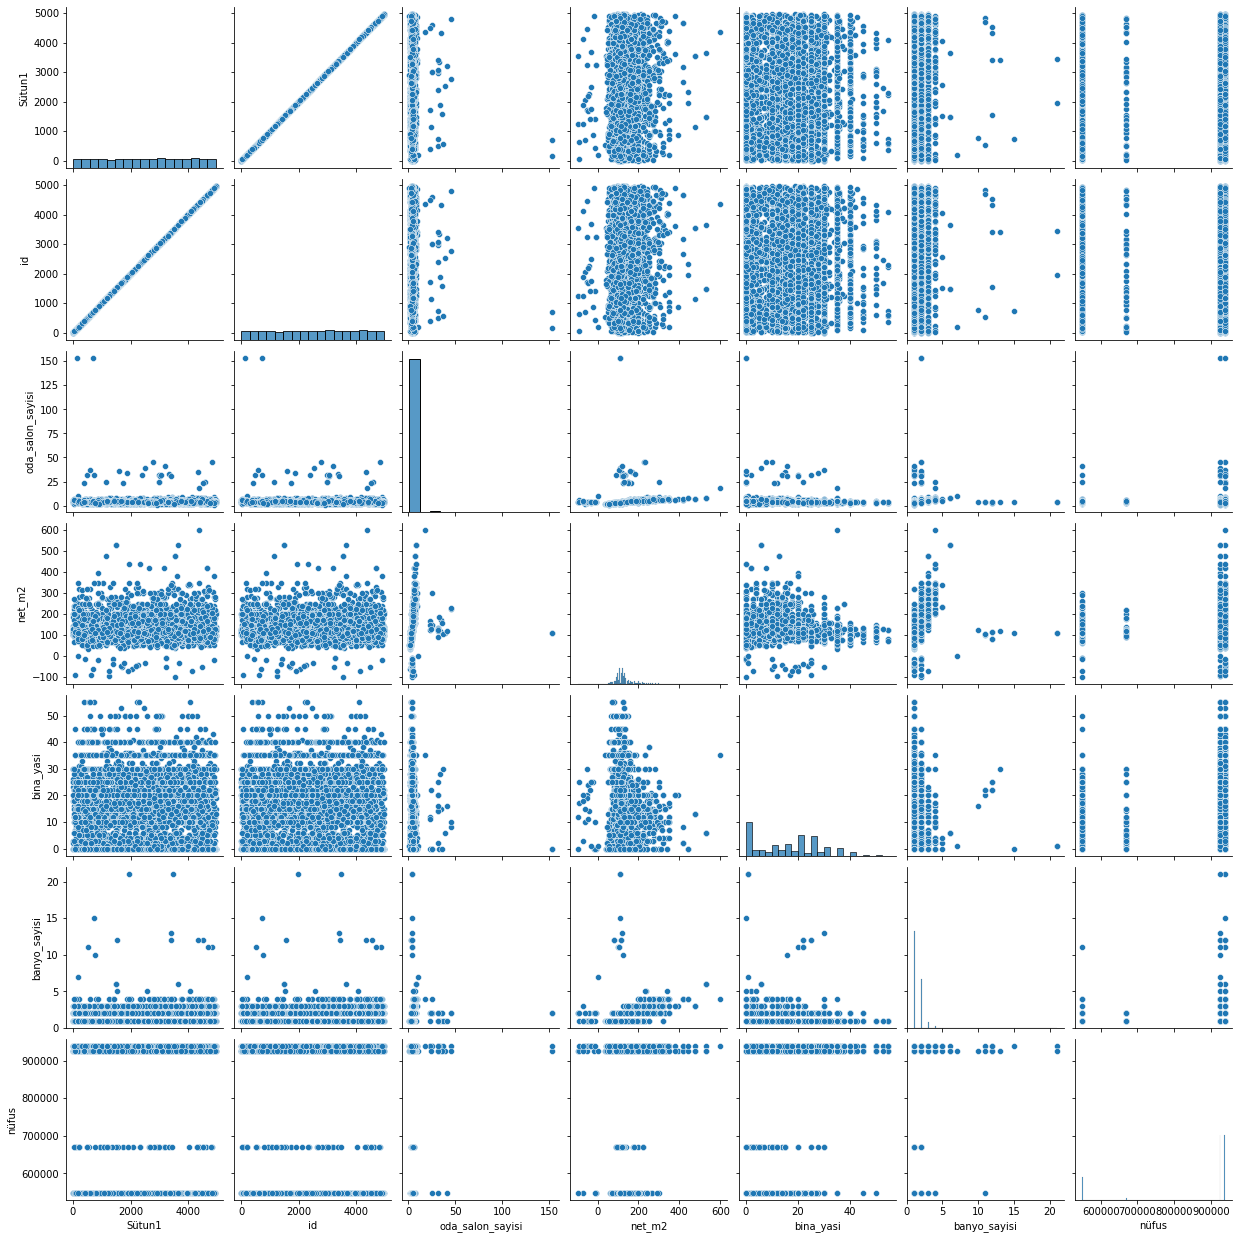

In [13]:
plot_show = 1
if plot_show ==1 :
    sns.pairplot(data, size=2.5) 

## Veri Setlerinin Incelenmesi

`fiyat`

In [14]:
Temp =[] 
for i,j in enumerate( data['fiyat'] ): 
    if ('E' in j) or 'e' in j:
        j = j.replace(',','') 
        j = j[:4] + str( int(j[-2:]) * str(0) ) 
        j = j[:3] + j[5:]
        Temp.append( int( j) /10 ) 
    else:
        Temp.append(int(j))        

data['fiyat'] = Temp 

`okuma_yazma_bilmeyen`

In [15]:
Temp =[] 
for i,j in enumerate( data['okuma_yazma_bilmeyen'] ): 
    j = j.replace(',','.') 
    Temp.append( float(j) ) 

data['okuma_yazma_bilmeyen'] = Temp  

In [16]:
pd.unique(data['isinma_tipi'])

array(['Kombi', 'Merkezi(PayÖlçer)', 'Merkezi', 'KatKaloriferi', 'Klima'],
      dtype=object)

In [17]:
Temp =[] 
for i,j in enumerate( data['isinma_tipi'] ): 
    if '?' in j:
        j = 'Merkezi'
        Temp.append( j ) 
    elif 'KatKaloriferi' == j:
        j = 'Kat Kaloriferi'
        Temp.append( j )         
    else:
        Temp.append(j) 
data['isinma_tipi'] = Temp  

`Egitim`

In [18]:
data.rename(columns={'eðitim':'Egitim'},inplace = True ) 

In [19]:
pd.unique(data['Egitim'])

array(['Lisans', 'liSans', 'Lise', 'liS3'], dtype=object)

In [20]:
Temp =[] 
for i,j in enumerate( data['Egitim'] ): 
    if 'S' in j:
        j = 'Lisans'
        Temp.append( j ) 
    elif '3' in j:
        Temp.append(j) 
    else:
        Temp.append(j) 
data['Egitim'] = Temp  

`bulundugu_kat`

In [21]:
pd.unique(data['bulundugu_kat'])

array(['Kot 1', '1. Kat', '3. Kat', '2. Kat', 'Ara Kat', 'Bahçe Katý',
       'Teras Katý', 'Yüksek Giriþ', '4. Kat', 'En Üst Kat', '9. Kat',
       'Kot 2', '5. Kat', '6. Kat', '7. Kat', '21 ve üzeri', 'Giriþ Katý',
       '13. Kat', 'Zemin', '12. Kat', '14. Kat', '11. Kat', '15. Kat',
       '20. Kat', 'Kot 3', '8. Kat', '17. Kat', 'Çatý Katý', '16. Kat',
       '10. Kat', '19. Kat', 'Bodrum', 'Villa Katý'], dtype=object)

In [22]:
Temp =[] 
for i,j in enumerate( data['bulundugu_kat'] ): 
    if 'Kot 1' in j:
        j = '1. Kat'
        Temp.append( j ) 
    elif 'Kot 2' in j:
        j = '2. Kat'
        Temp.append( j ) 
    elif 'Giri' in j:
        j = 'Giris Kati'
        Temp.append( j )
    elif '?at?' in j:
        j = 'Cati Kati'
        Temp.append( j )
    elif 'h?e' in j:
        j = 'Bahce Kati'
        Temp.append( j ) 
    elif 'Teras' in j:
        j = 'Teras Kati'
        Temp.append( j )
    elif 'ksek' in j:
        j = 'Yuksek Giris'
        Temp.append( j )
    elif 'st Kat' in j:
        j = 'En Ust Kat'
        Temp.append( j )  
    elif '21' in j:
        j = '21 Ve Uzeri'
        Temp.append( j )  
    elif 'Villa' in j:
        j = 'Villa Kati'
        Temp.append( j )                         
    else:
        Temp.append(j) 
data['bulundugu_kat'] = Temp  

`krediye_uygunluk`

In [23]:
Temp =[] 
for i,j in enumerate( data['krediye_uygunluk'] ): 
    if '?' in j:
        j = j.replace('?','g') 
        Temp.append( j ) 
    else:
        Temp.append(j) 
data['krediye_uygunluk'] = Temp  

In [24]:
data['Kredi_Uygunlugu'] = data['krediye_uygunluk'].map({'Uygun':1, 'Uygun degil':0 } ) 

`ilce`

In [25]:
Temp =[] 
for i,j in enumerate( data['ilce'] ): 
    if '?i?' in j:
        j = 'Kecioren'
        Temp.append( j ) 
    elif '?' in j:
        j = 'Antalya'
        Temp.append( j ) 
    elif 'cank' in j:
        j = 'Cankaya'
        Temp.append( j ) 
    else:
        Temp.append(j) 
data['ilce'] = Temp  

In [26]:
print('Before Antalya is out')
print( 'Number of Columns:', len( data.columns),'\nNumber of Rows:',len(data['id']) ) 
data = data[ data['ilce'] != 'Antalya']  
print('After Antalya is out')
print( 'Number of Columns:', len( data.columns),'\nNumber of Rows:',len(data['id']) ) 
data.head() 


Before Antalya is out
Number of Columns: 15 
Number of Rows: 4142
After Antalya is out
Number of Columns: 15 
Number of Rows: 4142


,Sütun1,id,fiyat,oda_salon_sayisi,net_m2,bina_yasi,isinma_tipi,krediye_uygunluk,bulundugu_kat,banyo_sayisi,ilce,nüfus,Egitim,okuma_yazma_bilmeyen,Kredi_Uygunlugu
0,2612,2612.0,275000.0,4.0,120.0,12.0,Kombi,Uygun,1. Kat,1.0,Çankaya,925828.0,Lisans,0.70,1.0
1,4819,4819.0,700000.0,3.0,88.0,0.0,Merkezi(PayÖlçer),Uygun,1. Kat,1.0,Çankaya,925828.0,Lisans,0.70,1.0
2,149,149.0,980000.0,5.0,230.0,30.0,Kombi,Uygun,3. Kat,2.0,Çankaya,925828.0,Lisans,0.70,1.0
3,3628,3628.0,385000.0,4.0,120.0,22.0,Kombi,Uygun,2. Kat,1.0,Keçiören,938565.0,Lise,1.43,1.0
4,3936,3936.0,700000.0,5.0,150.0,0.0,Kombi,Uygun,Ara Kat,2.0,Çankaya,925828.0,Lisans,0.70,1.0


Unique Value Check

In [27]:
Un_dict = {} 
for i in data:
    Un_dict[i] =len( pd.unique(data[i]))
Un_D = pd.DataFrame.from_dict(orient='index', data= Un_dict)
Un_D = Un_D.T 
Un_D = Un_D.rename(index= {0:'# of Unique Values'}) 
Un_D 

,Sütun1,id,fiyat,oda_salon_sayisi,net_m2,bina_yasi,isinma_tipi,krediye_uygunluk,bulundugu_kat,banyo_sayisi,ilce,nüfus,Egitim,okuma_yazma_bilmeyen,Kredi_Uygunlugu
# of Unique Values,3893,3893,503,25,187,47,5,2,30,13,5,4,2,5,2


In [28]:
for i in data:
    un = pd.unique( data[i] ) 
    if len(un) <= 10: 
        print(i, ':', un ) 

isinma_tipi : ['Kombi' 'Merkezi(PayÖlçer)' 'Merkezi' 'Kat Kaloriferi' 'Klima']
krediye_uygunluk : ['Uygun' 'Uygun deðil']
ilce : ['Çankaya' 'Keçiören' 'Sincan' 'Mamak' 'Cankaya']
nüfus : [925828. 938565. 549108. 669465.]
Egitim : ['Lisans' 'Lise']
okuma_yazma_bilmeyen : [0.7  1.43 1.44 0.   1.9 ]
Kredi_Uygunlugu : [ 1. nan]


### Plotting

In [29]:
plot_show = 0 
if plot_show ==1 :
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))

    fig.suptitle('Stats by Count')

    sns.boxplot(ax=axes[0, 0], data=data, x=cn[2])#, y='Attack')
    sns.boxplot(ax=axes[0, 1], data=data, x=cn[3])#, y='Defense')
    sns.boxplot(ax=axes[0, 2], data=data, x=cn[4])#, y='Speed')
    sns.boxplot(ax=axes[1, 0], data=data, x=cn[5])#, y='Sp. Atk')
    sns.boxplot(ax=axes[1, 1], data=data, x=cn[9])#, y='Sp. Def')
    sns.boxplot(ax=axes[1, 2], data=data, x=cn[-1])#, y='HP')


### Cevap 1
- NaN, Outlier & Unique degerler incelendi. 
- Veri iclerindeki operasyon yapmaya uygun olmayan ama aslinda degerli veriler, kullanilacak formatlara cevrildi. 

    * Fiyat yapisinin icindeki E degerleri duzeltildi.
    
    * Okuma Yazma Bilmeyenler verisinin icindeki oranlar duzeltildi. 
    * Kredi uygun degildeki `g` duzeltildi & Uygun/Uygun Degil cevaplari binary sekilde yeni bir sutun olarak eklendi
    * Ilce isimlerindeki problemler giderildi ve Antalya ili, veri setinden cikarildi. 
    * Lisans, LiSans; Lise, Lis3 gibi bozulmalar duzeltildi. 
    * Bulundugu kat sutunundaki veriler duzeiltildi. 
    Not: Verinin icerisinde 18. kat yoktu ama Cati kati var. 
    * Isinma tiplerindeki Merkezi ve Merkezi(PayOlcer), sadece Merkezi olarak birlestirildi. 

---
### SORU 2: 
Verilen veri seti üzerinden iki tane sayısal veri belirleyin ve bu değişkenler arasındaki ilişkiyi inceleyin. İncelerken kullandığınız yöntemleri ve yorumları açıklayın. 

In [30]:
pd.concat( [Un_D ,N_check(data) ], axis = 0)  

,Sütun1,id,fiyat,oda_salon_sayisi,net_m2,bina_yasi,isinma_tipi,krediye_uygunluk,bulundugu_kat,banyo_sayisi,ilce,nüfus,Egitim,okuma_yazma_bilmeyen,Kredi_Uygunlugu
# of Unique Values,3893,3893,503,25,187,47,5,2,30,13,5,4,2,5,2
# of NaN Values,0,0,0,0,0,0,0,0,0,0,0,0,0,0,73


In [31]:
data.head() 

,Sütun1,id,fiyat,oda_salon_sayisi,net_m2,bina_yasi,isinma_tipi,krediye_uygunluk,bulundugu_kat,banyo_sayisi,ilce,nüfus,Egitim,okuma_yazma_bilmeyen,Kredi_Uygunlugu
0,2612,2612.0,275000.0,4.0,120.0,12.0,Kombi,Uygun,1. Kat,1.0,Çankaya,925828.0,Lisans,0.70,1.0
1,4819,4819.0,700000.0,3.0,88.0,0.0,Merkezi(PayÖlçer),Uygun,1. Kat,1.0,Çankaya,925828.0,Lisans,0.70,1.0
2,149,149.0,980000.0,5.0,230.0,30.0,Kombi,Uygun,3. Kat,2.0,Çankaya,925828.0,Lisans,0.70,1.0
3,3628,3628.0,385000.0,4.0,120.0,22.0,Kombi,Uygun,2. Kat,1.0,Keçiören,938565.0,Lise,1.43,1.0
4,3936,3936.0,700000.0,5.0,150.0,0.0,Kombi,Uygun,Ara Kat,2.0,Çankaya,925828.0,Lisans,0.70,1.0


In [32]:
plot_show = 0
if plot_show ==1 :
    sns.pairplot(data, hue='ilce', size=2.5)

<AxesSubplot:xlabel='fiyat', ylabel='Count'>

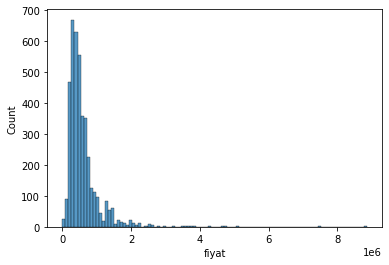

In [33]:
sns.histplot( data=  data, bins= 100,  x = "fiyat", legend=True, multiple = 'layer' )    

In [34]:
subsample = data[data['fiyat'] < data['fiyat'].quantile(0.95) ] 

<AxesSubplot:xlabel='fiyat', ylabel='Count'>

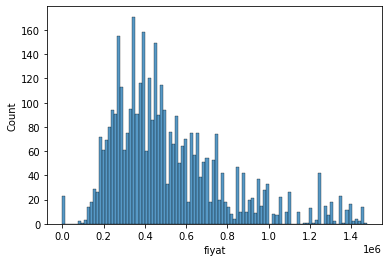

In [35]:
sns.histplot( data=  subsample, bins= 100,  x = "fiyat", legend=True, multiple = 'layer' )    

In [36]:
hoa = ['Q1','Q2'  ,'Q3','Q4'  ] 
q1 = subsample['fiyat'].quantile(0.25)  
q2 = subsample['fiyat'].quantile(0.5) 
q3 = subsample['fiyat'].quantile(0.75)  
subsample.loc[ (subsample['fiyat']<= q1), "fiyat group" ] = hoa[0] 
subsample.loc[ (subsample['fiyat']> q1) & (subsample['fiyat']<=q2 ) , "fiyat group" ] = hoa[1] 
subsample.loc[ (subsample['fiyat']> q2) & (subsample['fiyat']<=q3) , "fiyat group" ] = hoa[2]
subsample.loc[ (subsample['fiyat']> q3), "fiyat group" ] = hoa[3]

C:\Users\Asus\AppData\Local\Temp\ipykernel_4880\214053829.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsample.loc[ (subsample['fiyat']<= q1), "fiyat group" ] = hoa[0]


<AxesSubplot:xlabel='net_m2', ylabel='Count'>

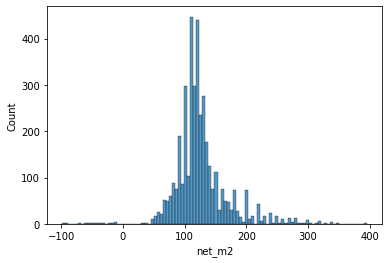

In [37]:
sns.histplot( data=  subsample, bins= 100,  x = "net_m2", legend=True, multiple = 'layer' )    

<AxesSubplot:xlabel='net_m2', ylabel='Count'>

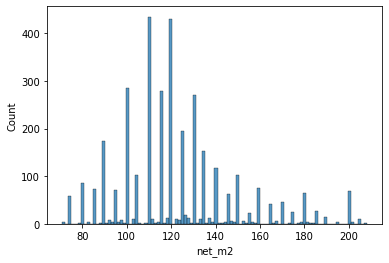

In [38]:
subsample = subsample[subsample['net_m2'] < subsample['net_m2'].quantile(0.95) ] 
subsample = subsample[subsample['net_m2'] > subsample['net_m2'].quantile(0.05) ] 
sns.histplot( data=  subsample, bins= 100,  x = "net_m2", legend=True, multiple = 'layer' )    

In [39]:
hoa = ['Q1','Q2'  ,'Q3','Q4'  ] 
q1 = subsample['net_m2'].quantile(0.25)  
q2 = subsample['net_m2'].quantile(0.5) 
q3 = subsample['net_m2'].quantile(0.75)  
subsample.loc[ (subsample['net_m2']<= q1), "net_m2 group" ] = hoa[0] 
subsample.loc[ (subsample['net_m2']> q1) & (subsample['net_m2']<=q2 ) , "net_m2 group" ] = hoa[1] 
subsample.loc[ (subsample['net_m2']> q2) & (subsample['net_m2']<=q3) , "net_m2 group" ] = hoa[2]
subsample.loc[ (subsample['net_m2']> q3), "net_m2 group" ] = hoa[3]

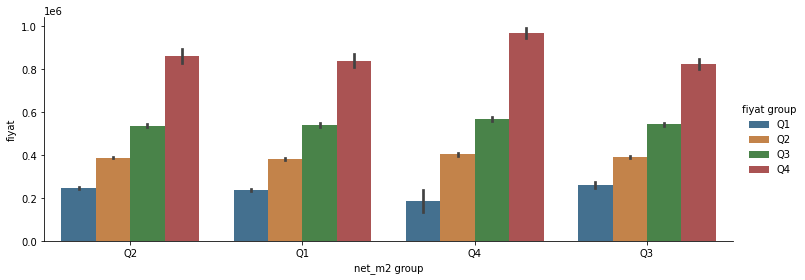

In [40]:
sns.catplot(x="net_m2 group", y="fiyat",

                hue="fiyat group", hue_order = hoa,
                #col="fiyat group",

                data=subsample, kind="bar",

                height=4, aspect=2.6,saturation=.5 ) 

Cevap 2:

Operasyonlar:

    * Pairplot uygulandi ve birbirleriyle en cok alakali olabilecek degiskenler grafige dokuldu. 

    * Fiyat ve metre kare arasinda bir baglanti icin, quantile`lar kullanilarak bu ikisinde outlier temizlemesi yapildi. 

Sonuc: 

    Her metre kare grubunda, evler kendi incde benzer sekilde dagilmis gozukmekte. Bu da evlerin asagi yukari ayni metre karelere sahip olsalar bile, kendi icinde henuz incelenmemis ozelliklere gore degerlenebildigine isaret ediyor. 

---
### Soru 3 
Verilen ilçelere göre kaç tane merkezi ısınmaya sahip 2.kat ve üzeri katlarda bulunan evler vardır? Grafik üzerinde gösteriniz. Grafiğinizi oluştururken yaptığınız operasyonları açıklayın.

In [41]:
print( 'Number of Columns:', len( data.columns),'\nNumber of Rows:',len(data['id']) ) 

subdata = data.copy()
subdata.head() 

Number of Columns: 15 
Number of Rows: 4142


,Sütun1,id,fiyat,oda_salon_sayisi,net_m2,bina_yasi,isinma_tipi,krediye_uygunluk,bulundugu_kat,banyo_sayisi,ilce,nüfus,Egitim,okuma_yazma_bilmeyen,Kredi_Uygunlugu
0,2612,2612.0,275000.0,4.0,120.0,12.0,Kombi,Uygun,1. Kat,1.0,Çankaya,925828.0,Lisans,0.70,1.0
1,4819,4819.0,700000.0,3.0,88.0,0.0,Merkezi(PayÖlçer),Uygun,1. Kat,1.0,Çankaya,925828.0,Lisans,0.70,1.0
2,149,149.0,980000.0,5.0,230.0,30.0,Kombi,Uygun,3. Kat,2.0,Çankaya,925828.0,Lisans,0.70,1.0
3,3628,3628.0,385000.0,4.0,120.0,22.0,Kombi,Uygun,2. Kat,1.0,Keçiören,938565.0,Lise,1.43,1.0
4,3936,3936.0,700000.0,5.0,150.0,0.0,Kombi,Uygun,Ara Kat,2.0,Çankaya,925828.0,Lisans,0.70,1.0


In [42]:
pd.unique(data['bulundugu_kat'])

array(['1. Kat', '3. Kat', '2. Kat', 'Ara Kat', 'Bahçe Katý',
       'Teras Kati', 'Giris Kati', '4. Kat', 'En Ust Kat', '9. Kat',
       '5. Kat', '6. Kat', '7. Kat', '21 Ve Uzeri', '13. Kat', 'Zemin',
       '12. Kat', '14. Kat', '11. Kat', '15. Kat', '20. Kat', 'Kot 3',
       '8. Kat', '17. Kat', 'Çatý Katý', '16. Kat', '10. Kat', '19. Kat',
       'Bodrum', 'Villa Kati'], dtype=object)

In [43]:
Ikinci_Kattan_Dusuk_Yerler = ['Ara Kat','Zemin','1. Kat','Giris Kati','Bahce Kati','Bodrum']  

In [44]:
Temp =[] 
for i,j in enumerate( subdata['bulundugu_kat'] ): 
    if j in Ikinci_Kattan_Dusuk_Yerler:
        j = 0
        Temp.append( j ) 
    else:
        j = 2
        Temp.append(j) 
subdata['bulundugu_kat'] = Temp  

In [45]:
Looking_For = subdata[ (subdata['isinma_tipi'] == 'Merkezi' ) & ( subdata['bulundugu_kat'] != 0)   ] 

<AxesSubplot:xlabel='ilce', ylabel='Count'>

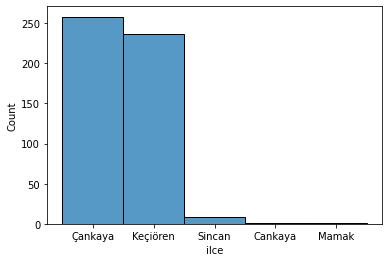

In [46]:
sns.histplot( data=  Looking_For, bins= 100,  x = "ilce", legend=True, multiple = 'layer' )    

<AxesSubplot:xlabel='ilce', ylabel='Count'>

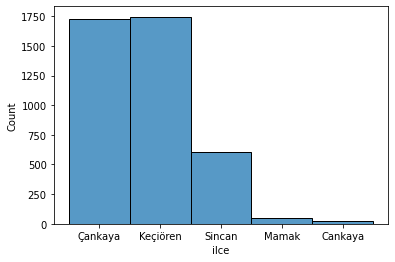

In [47]:
sns.histplot( data=  subdata, bins= 100,  x = "ilce", legend=True, multiple = 'layer' )    

### Cevap 3 
Operasyonlar: 
    
    * Orijinal veri, yeni bir deney degiskenine kopyalandi. 

    * Catplot icin mevcut isinma tipleri siralandi ve bir baska degiskene aktarildi.

Aciklama: 

    * Merkezi ısınmaya sahip 2.kat ve üzeri katlarda bulunan ev sayisi: 436

    * Genelde, ilce dagilimi, isitma tipindan bagimsiz gozukmektedir. 

---
### SORU 4: 
Eğitim düzeyi lisans olanların oranının yüksek olduğu ve fiyatı 5000’den az olan bir evde oturmak isteyen biri hangi ilçedeki evlere bakmalıdır? Grafik çıkartarak, çıkarımlarınızı yazılı olarak ifade edin ve grafiğinizi oluştururken yaptığınız operasyonları açıklayın.

In [48]:
print( 'Number of Columns:', len( data.columns),'\nNumber of Rows:',len(data['id']) ) 

subdata = data.copy()
subdata.head() 

Number of Columns: 15 
Number of Rows: 4142


,Sütun1,id,fiyat,oda_salon_sayisi,net_m2,bina_yasi,isinma_tipi,krediye_uygunluk,bulundugu_kat,banyo_sayisi,ilce,nüfus,Egitim,okuma_yazma_bilmeyen,Kredi_Uygunlugu
0,2612,2612.0,275000.0,4.0,120.0,12.0,Kombi,Uygun,1. Kat,1.0,Çankaya,925828.0,Lisans,0.70,1.0
1,4819,4819.0,700000.0,3.0,88.0,0.0,Merkezi(PayÖlçer),Uygun,1. Kat,1.0,Çankaya,925828.0,Lisans,0.70,1.0
2,149,149.0,980000.0,5.0,230.0,30.0,Kombi,Uygun,3. Kat,2.0,Çankaya,925828.0,Lisans,0.70,1.0
3,3628,3628.0,385000.0,4.0,120.0,22.0,Kombi,Uygun,2. Kat,1.0,Keçiören,938565.0,Lise,1.43,1.0
4,3936,3936.0,700000.0,5.0,150.0,0.0,Kombi,Uygun,Ara Kat,2.0,Çankaya,925828.0,Lisans,0.70,1.0


In [49]:
pd.unique(subdata['Egitim'])

array(['Lisans', 'Lise'], dtype=object)

In [50]:
subdata = subdata[subdata['Egitim'] == "Lise"]  
print( 'Number of Columns:', len( subdata.columns),'\nNumber of Rows:',len(subdata['id']) ) 

Number of Columns: 15 
Number of Rows: 2372


In [51]:
subdata = subdata[subdata['fiyat'] < 5000 ]  
print( 'Number of Columns:', len( subdata.columns),'\nNumber of Rows:',len(subdata['id']) ) 

Number of Columns: 15 
Number of Rows: 12


In [52]:
subdata.reset_index(inplace = True) 
subdata.set_index('index') 
subdata = subdata.iloc[:,1:] 

In [53]:
print( '5000`den asagida, Lisans duzeyindeki evler:', pd.unique( subdata['ilce'] )  )
subdata

5000`den asagida, Lisans duzeyindeki evler: ['Keçiören' 'Sincan']


,Sütun1,id,fiyat,oda_salon_sayisi,net_m2,bina_yasi,isinma_tipi,krediye_uygunluk,bulundugu_kat,banyo_sayisi,ilce,nüfus,Egitim,okuma_yazma_bilmeyen,Kredi_Uygunlugu
0,1276,1276.0,750.0,4.0,115.0,0.0,Kombi,Uygun,1. Kat,1.0,Keçiören,938565.0,Lise,1.43,1.0
1,1104,1104.0,685.0,4.0,110.0,3.0,Kombi,Uygun,Giris Kati,1.0,Keçiören,938565.0,Lise,1.43,1.0
2,397,397.0,1080.0,23.0,165.0,0.0,Merkezi(PayÖlçer),Uygun,4. Kat,2.0,Keçiören,938565.0,Lise,1.43,1.0
3,2188,2188.0,358.0,4.0,-48.0,24.0,Kombi,Uygun,2. Kat,1.0,Keçiören,938565.0,Lise,1.43,1.0
4,16,16.0,790.0,3.0,100.0,0.0,Merkezi(PayÖlçer),Uygun,Bahçe Katý,2.0,Keçiören,938565.0,Lise,1.43,1.0
5,3728,3728.0,850.0,4.0,120.0,5.0,Kombi,Uygun,Giris Kati,1.0,Sincan,549108.0,Lise,1.44,1.0
6,3065,3065.0,695.0,5.0,138.0,10.0,Kombi,Uygun,2. Kat,2.0,Keçiören,938565.0,Lise,1.43,1.0
7,299,299.0,449.0,4.0,110.0,25.0,Kombi,Uygun,2. Kat,1.0,Keçiören,938565.0,Lise,1.43,1.0
8,2188,2188.0,358.0,4.0,-48.0,24.0,Kombi,Uygun,2. Kat,1.0,Keçiören,938565.0,Lise,1.43,1.0
9,1817,1817.0,525.0,3.0,75.0,50.0,Kombi,Uygun,2. Kat,1.0,Keçiören,938565.0,Lise,1.43,1.0


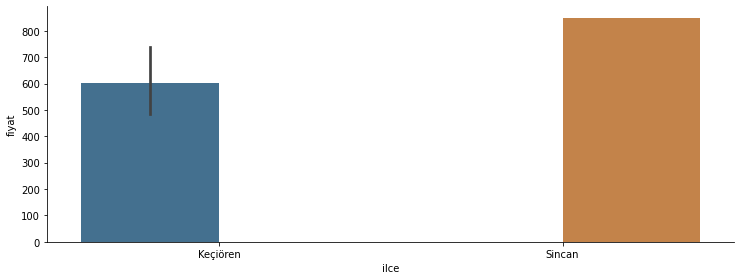

In [54]:
plot_show2 = 1
if plot_show2 == 1: 
    sns.catplot(x="ilce", y="fiyat",

                    hue="ilce",# hue_order = No_Order,
                    #col="bulundugu_kat",

                    data=subdata, kind="bar",

                    height=4, aspect=2.6,saturation=.5 ) 

### Cevap 4
Operasyonlar: 

    * Orijinal veri, yeni bir deney degiskenine kopyalandi. 

    * Veri seti, egitim seviyesi ve fiyat parametrelerine gore filtrelendi. 

    * Veriler, ilce ve fiyat bazinda catplot yardimiyla grafiklestirildi. 

Aciklama:

    * Kisi, Kecioren & Sincan`da oturmalidir. 

---
### SORU 5: 
İlçelere göre ısınma türlerinden hangisinin daha uygun fiyata sahip olduğunu bulun. Grafik çıkartarak, çıkarımlarınızı yazılı olarak ifade edin ve grafiğinizi oluştururken yaptığınız operasyonları açıklayın.

In [55]:
subdata = data.copy()
subdata.head() 

,Sütun1,id,fiyat,oda_salon_sayisi,net_m2,bina_yasi,isinma_tipi,krediye_uygunluk,bulundugu_kat,banyo_sayisi,ilce,nüfus,Egitim,okuma_yazma_bilmeyen,Kredi_Uygunlugu
0,2612,2612.0,275000.0,4.0,120.0,12.0,Kombi,Uygun,1. Kat,1.0,Çankaya,925828.0,Lisans,0.70,1.0
1,4819,4819.0,700000.0,3.0,88.0,0.0,Merkezi(PayÖlçer),Uygun,1. Kat,1.0,Çankaya,925828.0,Lisans,0.70,1.0
2,149,149.0,980000.0,5.0,230.0,30.0,Kombi,Uygun,3. Kat,2.0,Çankaya,925828.0,Lisans,0.70,1.0
3,3628,3628.0,385000.0,4.0,120.0,22.0,Kombi,Uygun,2. Kat,1.0,Keçiören,938565.0,Lise,1.43,1.0
4,3936,3936.0,700000.0,5.0,150.0,0.0,Kombi,Uygun,Ara Kat,2.0,Çankaya,925828.0,Lisans,0.70,1.0


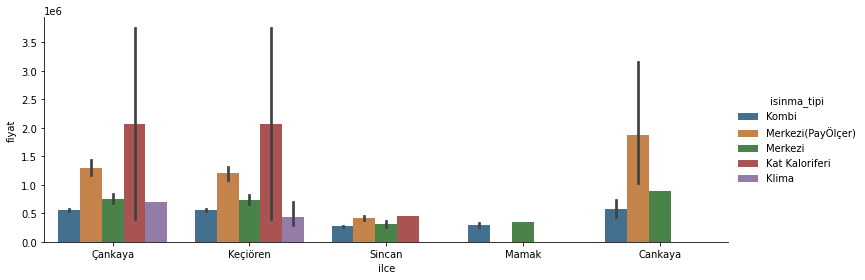

In [56]:
Isinma_Turleri = list( pd.unique( subdata['isinma_tipi'] )) 

sns.catplot(x="ilce", y="fiyat",

                hue="isinma_tipi", hue_order = Isinma_Turleri,
                #col="isinma_tipi",

                data=subdata, kind="bar",

                height=4, aspect=2.6,saturation=.5 ) 

### Cevap 5:
Operasyolar: 

    * Orijinal veri, yeni bir deney degiskenine kopyalandi. 

    * Catplot icin mevcut isinma tipleri siralandi ve bir baska degiskene aktarildi.

Aciklama:
    
    - Neredeyse her ilcenin, isinma tipine gore fiyatlandirmasinin farkli oldugunu gormekteyiz. 

    - Ilcelerin her birisinde, her tip isinma tipine dair veri bulunmamaktadir. 

    En uygun isinma tipleri:

    - Cankaya: Kombi
    - Mamak: Merkezi
    - Sincan: Kombi
    - Kecioren: Klima

Tahmin:

    Keciorendeki Klima kullaniminin fiyatlandirmasi, digerlerinden daha dusuk/uygun oldugundan, eger veri setimize klimaya dair veri eklemek adina calisma yaparsak, diger illerde de en uygun isinma tipinin Klima olabilecegini gorebiliriz. 

    Bunun yaninda, Mamak ve Sincan`daki verileri, grafikte birbirlerine cok yakin oldugundan, bu iki ilce ozelinde Tukey HSD testleri uygulanildi. Cikan sonuclar gosteriyor ki Sincan`daki fark istatistiki olarak onemli olsa da, Mamak`ta Merkezi isitmanin istatistiki olarak daha iyi oldugunu soylemek mumkun degil. 

In [57]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd 

Mamak = subdata[ subdata['ilce'] =='Mamak']
Sincan = subdata[ subdata['ilce'] =='Sincan']

In [58]:
tukey = pairwise_tukeyhsd(endog=Mamak['fiyat'],
                          groups=Mamak['isinma_tipi'],
                          alpha=0.05) 
print(tukey)                          

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1  group2  meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------
 Kombi Merkezi 44318.1818 0.7036 -189028.2391 277664.6027  False
----------------------------------------------------------------


In [59]:
tukey = pairwise_tukeyhsd(endog=Sincan['fiyat'],
                          groups=Sincan['isinma_tipi'],
                          alpha=0.05) 
print(tukey)                          

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
    group1           group2        meandiff   p-adj     lower        upper    reject
------------------------------------------------------------------------------------
Kat Kaloriferi             Kombi -174251.0121 0.4124 -465171.2778 116669.2537  False
Kat Kaloriferi           Merkezi    -141500.0 0.6216 -443098.9605 160098.9605  False
Kat Kaloriferi Merkezi(PayÖlçer)  -28947.9167 0.9942 -321085.7132 263189.8799  False
         Kombi           Merkezi   32751.0121 0.7299  -48902.0952 114404.1193  False
         Kombi Merkezi(PayÖlçer)  145303.0954    0.0   112902.646 177703.5448   True
       Merkezi Merkezi(PayÖlçer)  112552.0833 0.0043   26661.9148 198442.2519   True
------------------------------------------------------------------------------------


References:

* https://seaborn.pydata.org/generated/seaborn.catplot.html

* https://www.statsmodels.org/0.8.0/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html

* https://www.statology.org/tukey-test-python/

* https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8